In [ ]:
from google.colab import drive
drive.mount('/content/drive')



!pip install fingerflow






Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
from fingerflow.extractor import Extractor
coarse_net_path = "/content/drive/MyDrive/FingerFlow/CoarseNet.h5"
fine_net_path = "/content/drive/MyDrive/FingerFlow/FineNet.h5"
classify_net_path = "/content/drive/MyDrive/FingerFlow/ClassifyNet_6_classes.h5"
core_net_path = "/content/drive/MyDrive/FingerFlow/CoreNet.weights"
extractor = Extractor(coarse_net_path, fine_net_path, classify_net_path, core_net_path)



Loading FineNet weights from /content/drive/MyDrive/FingerFlow/FineNet.h5
Loading ClassifyNet weights from /content/drive/MyDrive/FingerFlow/ClassifyNet_6_classes.h5
nms iou: 0.413 score: 0.3
all weights read
Core net weights loaded from /content/drive/MyDrive/FingerFlow/CoreNet.weights


In [ ]:
image_real = cv2.imread("/content/sample_data/real_10.tif")
image_predict = cv2.imread("/content/sample_data/predicted_10.tif")
extracted_minutiae_real=extractor.extract_minutiae(image_real)
extracted_minutiae_predict=extractor.extract_minutiae(image_predict)
#extracted_minutiae = extract_minutiae(image)


/usr/local/lib/python3.10/dist-packages/fingerflow/extractor/MinutiaeNet/CoarseNet/minutiae_net_utils.py:660: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  cos_2_theta = filters.gaussian(cos_2_theta, sigma, multichannel=False, mode='reflect')
/usr/local/lib/python3.10/dist-packages/fingerflow/extractor/MinutiaeNet/CoarseNet/minutiae_net_utils.py:661: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sin_2_theta = filters.gaussian(sin_2_theta, sigma, multichannel=False, mode='reflect')


1/1 [==============================] - 0s 36ms/step


/usr/local/lib/python3.10/dist-packages/fingerflow/extractor/MinutiaeNet/CoarseNet/minutiae_net_utils.py:660: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  cos_2_theta = filters.gaussian(cos_2_theta, sigma, multichannel=False, mode='reflect')
/usr/local/lib/python3.10/dist-packages/fingerflow/extractor/MinutiaeNet/CoarseNet/minutiae_net_utils.py:661: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sin_2_theta = filters.gaussian(sin_2_theta, sigma, multichannel=False, mode='reflect')


1/1 [==============================] - 0s 69ms/step


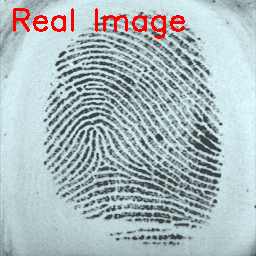

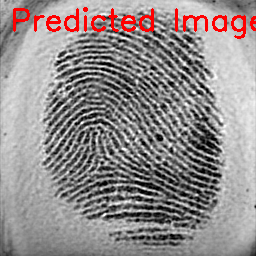

In [ ]:
from google.colab.patches import cv2_imshow

# Display the real image with a label
cv2_imshow(cv2.putText(image_real, 'Real Image', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2))

# Display the predicted image with a label
cv2_imshow(cv2.putText(image_predict, 'Predicted Image', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2))


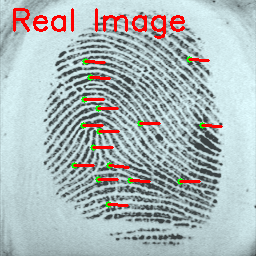

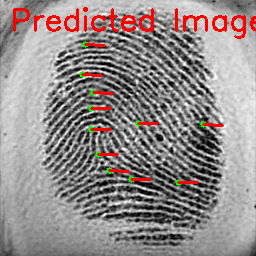

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the first image
image = cv2.imread('/content/sample_data/real_10.tif')

# Minutiae data for the first image
# Remove the first line
minutia = extracted_minutiae_real.get('minutiae')
data_string = str(minutia)
data_string = '\n'.join(data_string.split('\n')[1:])

# Split rows and values
rows = data_string.split('\n')
values = [row.split() for row in rows]

# Convert values to appropriate data types and enclose in []
data_list = [[float(value) if value.replace('.', '', 1).isdigit() else value for value in row] for row in values]

# Draw minutiae on the first image
for minutia in data_list:
    ind, x, y, angle, score, _class = minutia

    # Draw a circle marker at the minutia location
    cv2.circle(image, (int(x), int(y)), 3, (0, 255, 0), -1)

    # Draw a line to represent the angle of the minutia
    angle_radians = np.deg2rad(angle)
    line_length = 20
    x2 = int(x + line_length * np.cos(angle_radians))
    y2 = int(y + line_length * np.sin(angle_radians))
    cv2.line(image, (int(x), int(y)), (x2, y2), (0, 0, 255), 2)
# Add label to the first image
cv2.putText(image, 'Real Image', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Display the first image with the extracted minutiae
cv2_imshow(image)

# Load the second image
image1 = cv2.imread('/content/sample_data/predicted_10.tif')

# Minutiae data for the second image
# Remove the first line
minutia1 = extracted_minutiae_predict.get('minutiae')
data_string1 = str(minutia1)
data_string1 = '\n'.join(data_string1.split('\n')[1:])

# Split rows and values
rows1 = data_string1.split('\n')
values1 = [row.split() for row in rows1]

# Convert values to appropriate data types and enclose in []
data_list1 = [[float(value) if value.replace('.', '', 1).isdigit() else value for value in row] for row in values1]

# Draw minutiae on the second image
for minutia in data_list1:
    ind, x, y, angle, score, _class = minutia

    # Draw a circle marker at the minutia location
    cv2.circle(image1, (int(x), int(y)), 3, (0, 255, 0), -1)

    # Draw a line to represent the angle of the minutia
    angle_radians = np.deg2rad(angle)
    line_length = 20
    x2 = int(x + line_length * np.cos(angle_radians))
    y2 = int(y + line_length * np.sin(angle_radians))
    cv2.line(image1, (int(x), int(y)), (x2, y2), (0, 0, 255), 2)
# Add label to the second image
cv2.putText(image1, 'Predicted Image', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Display the second image with the extracted minutiae
cv2_imshow(image1)
